In [1]:
import os
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/kscanne/1070/master/lab07/"
TRAIN_URL = DOWNLOAD_ROOT + "train.csv"
TEST_URL = DOWNLOAD_ROOT + "test.csv"
DATASET_PATH = "/home/floccom/Spring2019/MachineLearning/kNN_classifier"

def fetch_data(train_url=TRAIN_URL, test_url=TEST_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
    train_path = os.path.join(dataset_path, "train.csv")
    test_path = os.path.join(dataset_path, "test.csv")
    urllib.request.urlretrieve(train_url, train_path)
    urllib.request.urlretrieve(test_url, test_path)


In [4]:
fetch_data()

In [25]:
import numpy as np

def load_data(dataset_path=DATASET_PATH):
    csv_train_path = os.path.join(dataset_path, "train.csv")
    csv_test_path = os.path.join(dataset_path, "test.csv")
    return np.genfromtxt(csv_train_path, delimiter=','), np.genfromtxt(csv_test_path, delimiter=',')


In [26]:
train_data, test_data = load_data()

In [39]:
y_train = train_data[:,0]
X_train = train_data[:,1:]
y_test = test_data[:,0]
X_test = test_data[:,1:]


In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def show_digit(some_digit):
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()

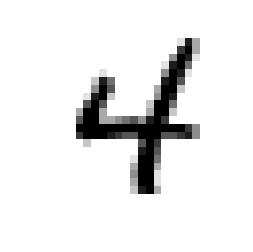

In [43]:
show_digit(X_train[2500])

In [44]:
y_train[2500]

4.0

In [60]:
def binary_classifier(example, digit, K):
    S = []
    for x, y in zip(X_train, y_train):
        diff = np.sum((np.absolute(example-x)))
        S.append((diff, y))
    S.sort(key=lambda x: x[0])
    y = 0
    for k in range(K):
        if S[k][1] == digit:
            y += 1
        else:
            y -= 1
    return np.sign(y)

In [66]:
def multiclass_classifier(example, K):
    digit = 0
    while binary_classifier(example, digit, K) < 1 and digit < 10:
        digit += 1
    return digit

In [69]:
multiclass_classifier(X_train[2500], 100)

4

In [73]:
def accuracy():
    TP = 0
    for x,y in zip(X_test, y_test):
        if multiclass_classifier(x, 10) == y:
            TP += 1
    return TP/100

In [74]:
accuracy()

0.87